# This is Heart Disease Predtion Project
we are going to predict based on the data whether someone have the heart disease or not

* 1- Problem Defination
* 2- Data
* 3- Evaluate 
* 4- Feature
* 5- Modelling
* 6- Experimentations


# 1-Problem Defination
> Based on the given data whe need to predict if a patient has heart disease or not

# 2- Data
> We have the data and have loaded it alread

# 3- Evaluate
> In initial stages we need to make sure, if our model gives us the accuray of 95%

# 4- Features
> What features are import, what features columns means what

age=>
age in years

sex=>
(1 = male; 0 = female)

cp=>
chest pain type

trestbps=>
resting blood pressure (in mm Hg on admission to the hospital)


chol=>
serum cholestoral in mg/dl


fbs=>
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)


restecg=>
resting electrocardiographic results


thalach=>
maximum heart rate achieved


exang=>
exercise induced angina (1 = yes; 0 = no)


oldpeak=>
ST depression induced by exercise relative to rest


slope=>
the slope of the peak exercise ST segment


ca=>
number of major vessels (0-3) colored by flourosopy


thal=>
3 = normal; 6 = fixed defect; 7 = reversable defect

target=>
1 or 0

# Tools Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Importing Models of skleanr
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Import Evaluation Libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

# Exploring the Data Initial Stage

1- What problem i am going to solve
2- What kind of data i have
3- Does this data have missing values
4- Are there any outliers, sporious vectors 
5- Can we add or remove some of the feartures


In [2]:
df = pd.read_csv('datasets_33180_43520_heart.csv')
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

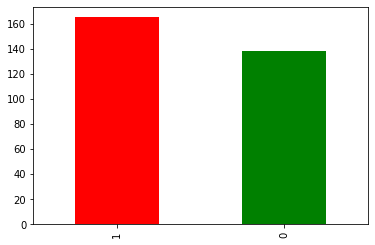

In [6]:
df['target'].value_counts().plot(kind='bar', color=['red','green']);

In [7]:
df.isna().sum() # Are there any missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
len(df)

303

In [11]:
pd.crosstab(df.target,df.sex)


sex,0,1
target,,
0,24,114
1,72,93


In [12]:
72/96

0.75

In [13]:
93/207

0.4492753623188406

(array([0, 1]), <a list of 2 Text xticklabel objects>)

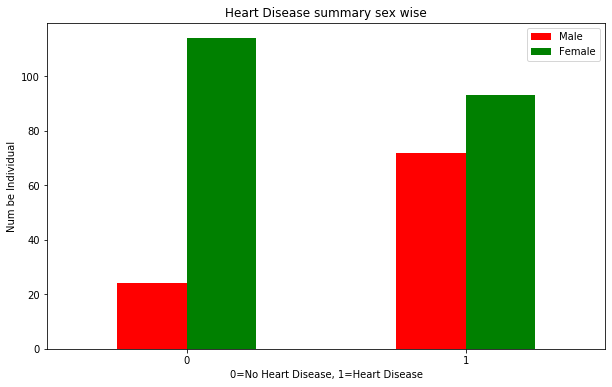

In [14]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['red','green'])
plt.title('Heart Disease summary sex wise')
plt.xlabel('0=No Heart Disease, 1=Heart Disease')
plt.ylabel("Num be Individual")
plt.legend(["Male","Female"])
plt.xticks(rotation=0)

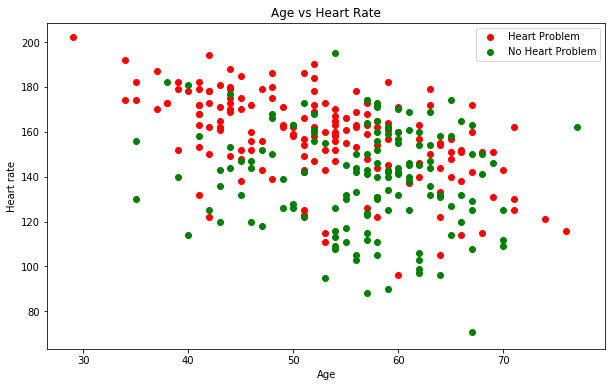

In [36]:
# Finding Pattrens in Data Using Scatter Plot
plt.figure(figsize=(10,6))
# Create scatter plot
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="red");
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="green");
plt.title('Age vs Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart rate')
plt.legend(["Heart Problem","No Heart Problem"])

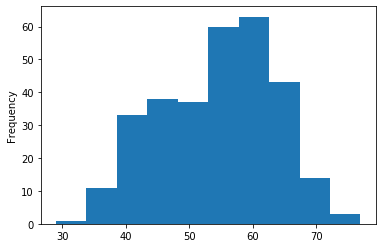

In [38]:
# Create Histogram to see age Distribution
df.age.plot.hist();

In [45]:
df.cp.value_counts()


0    143
2     87
1     50
3     23
Name: cp, dtype: int64

* cp: chest pain type
    * -- Value 0: typical angina: Chest pain dues to decrease blood pressure
    * -- Value 1: atypical angina: Chest Pain not related to Heart Problem
    * -- Value 2: non-anginal pain: Not Heart Related
    * -- Value 3: asymptomatic : Chest Paint not showing Heart Problem

In [46]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


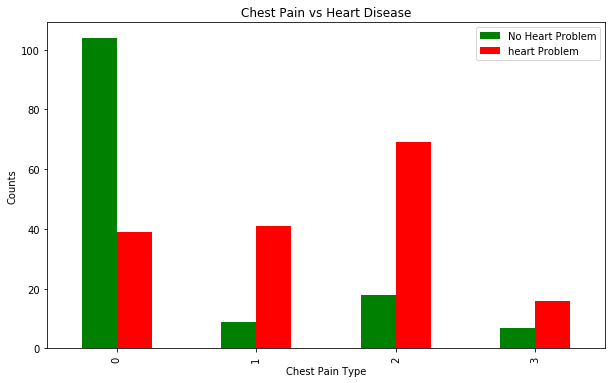

In [47]:
# Make the Bar chart of Chest pain vs target
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=['green','red'])
# Make some diescription of the chart
plt.title('Chest Pain vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Counts')
plt.legend(["No Heart Problem","heart Problem"])

# Correlation Matrix

In [48]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


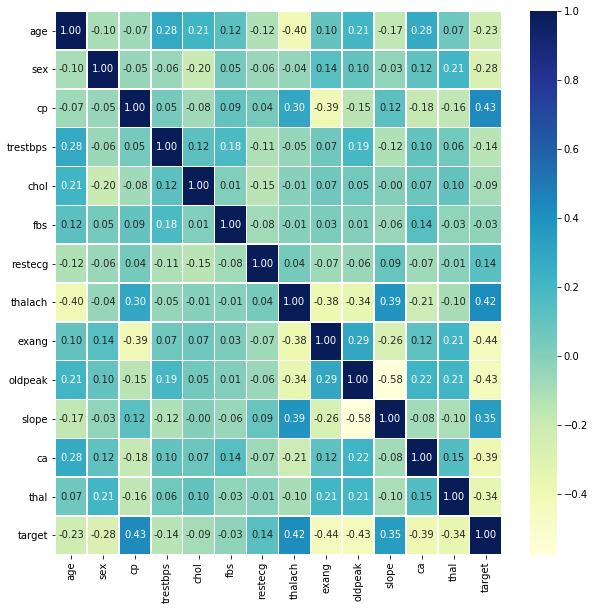

In [52]:
# Lets Draw Corelation Map
cor_map = df.corr()
home,room = plt.subplots(figsize=(10,10))
room  = sns.heatmap(cor_map,
                   annot=True,
                   linewidths=0.5,
                   fmt="0.2f",
                   cmap="YlGnBu");

# 1. Problem Defination
    We have a Data and we need to predict heart disease or no heart disease
# 2. Evaluation
    We need 95% Accuracy
# 3. Modelling


In [58]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [59]:
# SPlit into test and train data
X  = df.drop("target", axis=1)
y  = df["target"]

In [62]:
# Using Random seed, so that others could produce the same result
np.random.seed(7)
# Split into test and train Data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [64]:
len(X)

303

In [65]:
len(X_train)

242

# The Models we are going to Use
    1.K-Nearest Neighbours Classifier
    2.Random Forest CLassifier
    3.Logistic Regression

In [73]:
# Putting the models into a Dictionary
models = {"KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier(),
         "Logistic Regression": LogisticRegression()}
# Create FUnction to evaluate the models

def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(7)
    # make a Dictionary to score the model
    model_score = {}
    # Looping through
    for name,model in models.items():
        model.fit(X_train,y_train)
        # Evaluate the model and append it score
        model_score[name] = model.score(X_test,y_test)
    return model_score

In [74]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\mohsi\Desktop\AI-Course\cardio_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.5573770491803278,
 'Random Forest': 0.7213114754098361,
 'Logistic Regression': 0.7540983606557377}

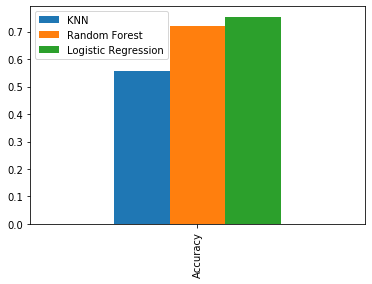

In [75]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.plot.bar();

# Imporving and Tuning the Model
    Universal Methods used for all Classifications problems
    
    * Hyperparameter Tunning
    * Features Improving
    Advanced Level
    * Confusion_Matrix
    * Cross_validation
    * Precision 
    * Recall
    * f1
    * Classification Report
    * ROC Curve
    

    * Hyperparameter Tunning
    * Features Improving

In [84]:
# 
train_score = []
test_score = []
# Create range to be test for n_neighbors
nneighbours = range(1,30)
# KNN Instance
KNN = KNeighborsClassifier()
# Looping though the range
for i in nneighbours:
    KNN.set_params(n_neighbors=i)
    # Run the fit for ith value
    KNN.fit(X_train,y_train)
    # Update the Trsaining Score
    train_score.append(KNN.score(X_train,y_train))
    # Update the test score list
    test_score.append(KNN.score(X_test,y_test))
    



In [87]:
train_score

[1.0,
 0.8099173553719008,
 0.7768595041322314,
 0.756198347107438,
 0.7603305785123967,
 0.731404958677686,
 0.743801652892562,
 0.7148760330578512,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.7231404958677686,
 0.731404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.6900826446280992,
 0.7272727272727273,
 0.71900826446281,
 0.7107438016528925,
 0.7024793388429752,
 0.7024793388429752,
 0.7024793388429752,
 0.7107438016528925,
 0.6900826446280992,
 0.7107438016528925,
 0.7066115702479339,
 0.7107438016528925,
 0.7066115702479339,
 0.7066115702479339]

In [88]:
test_score

[0.6065573770491803,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.5573770491803278,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.6557377049180327]

# Plot the Accuracy Score

Max KNN Score:70.49%


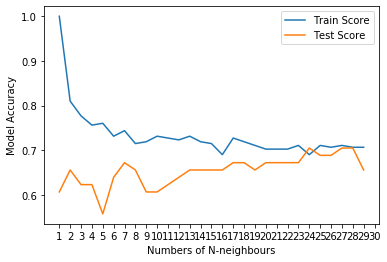

In [93]:
plt.plot(nneighbours,train_score, label="Train Score")
plt.plot(nneighbours,test_score, label="Test Score")
plt.xticks(np.arange(1,31,1))
plt.xlabel('Numbers of N-neighbours')
plt.ylabel('Model Accuracy')
plt.legend()
print(f"Max KNN Score:{max(test_score)*100:0.2f}%")